In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer

In [2]:
#reading the dataset
red_wine = pd.read_csv('winequality-red.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#shape of dataset
red_wine.shape

(1599, 12)

In [4]:
input_shape=[11]

In [5]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
feature_s = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
feature_s

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [7]:
#Scaling the feature values
preprocessor = make_column_transformer(
    (StandardScaler(), feature_s))

In [8]:
#scaled dataset
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
# from tensorflow import keras
# from tensorflow.keras import layers
model =  keras.Sequential([layers.Dense(units=1, input_shape=[11])])

In [10]:
w, b = model.weights
print("Weightsn{}nnBiasn{}".format(w, b))

Weightsn<tf.Variable 'dense/kernel:0' shape=(11, 1) dtype=float32, numpy=
array([[ 0.3065446 ],
       [ 0.11668408],
       [-0.27732608],
       [ 0.6492396 ],
       [-0.7018192 ],
       [-0.00965297],
       [ 0.35664743],
       [ 0.4856246 ],
       [ 0.6953997 ],
       [-0.03609794],
       [ 0.25195068]], dtype=float32)>nnBiasn<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


4/4 [==============================] - 0s 5ms/step


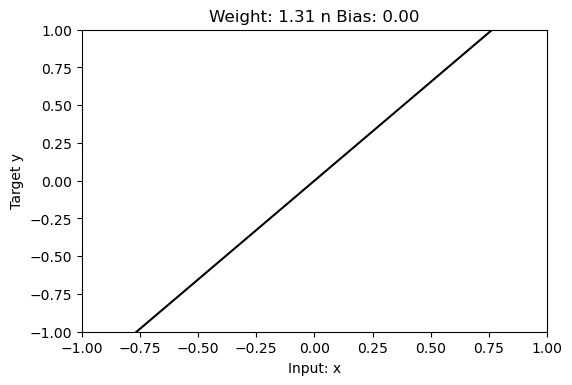

In [11]:
model = keras.Sequential([
    layers.Dense(1, input_shape=[1]),
])
x = tf.linspace(-1.0, 1.0, 100)
y = model.predict(x)
plt.figure(dpi=100)
plt.plot(x, y, 'k')
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.xlabel("Input: x")
plt.ylabel("Target y")
w, b = model.weights 
plt.title("Weight: {:0.2f} n Bias: {:0.2f}".format(w[0][0], b[0]))
plt.show()

In [12]:
model = keras.Sequential([layers.Dense(units=512,activation='relu',input_shape=[11]),
                          layers.Dense(units=512,activation='relu'),
                          layers.Dense(units=512,activation='relu'),
                          layers.Dense(units=1)])

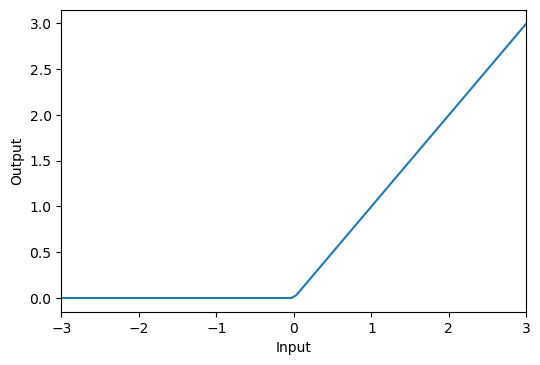

In [13]:
activation_layer = layers.Activation('relu')
x = tf.linspace(-3.0, 3.0, 100)
y = activation_layer(x) 
plt.figure(dpi=100)
plt.plot(x, y)
plt.xlim(-3, 3)
plt.xlabel("Input")
plt.ylabel("Output")
plt.show()

## Training the Dataset

In [14]:
df_train = red_wine.sample(frac=0.7, random_state=5)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
236,7.2,0.63,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.9,4
424,7.7,0.96,0.20,2.0,0.047,15.0,60.0,0.99550,3.36,0.44,10.9,5
982,7.3,0.52,0.32,2.1,0.070,51.0,70.0,0.99418,3.34,0.82,12.9,6


In [15]:
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

In [30]:
max_

fixed acidity            15.90000
volatile acidity          1.58000
citric acid               1.00000
residual sugar           15.50000
chlorides                 0.61100
free sulfur dioxide      68.00000
total sulfur dioxide    289.00000
density                   1.00369
pH                        4.01000
sulphates                 2.00000
alcohol                  14.90000
quality                   8.00000
dtype: float64

In [16]:
X_train = df_train.drop('quality', axis=1)

X_valid = df_valid.drop('quality', axis=1)

y_train = df_train['quality']

y_valid = df_valid['quality']

In [17]:
X_train.shape


(1119, 11)

In [18]:
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [19]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [20]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 2s 127ms/step - loss: 0.2978 - val_loss: 0.1287
Epoch 2/10
5/5 [==============================] - 0s 59ms/step - loss: 0.1416 - val_loss: 0.1206
Epoch 3/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1267 - val_loss: 0.1112
Epoch 4/10
5/5 [==============================] - 0s 33ms/step - loss: 0.1179 - val_loss: 0.1089
Epoch 5/10
5/5 [==============================] - 0s 34ms/step - loss: 0.1103 - val_loss: 0.1061
Epoch 6/10
5/5 [==============================] - 0s 25ms/step - loss: 0.1079 - val_loss: 0.1053
Epoch 7/10
5/5 [==============================] - 0s 27ms/step - loss: 0.1062 - val_loss: 0.1062
Epoch 8/10
5/5 [==============================] - 0s 26ms/step - loss: 0.1022 - val_loss: 0.1035
Epoch 9/10
5/5 [==============================] - 0s 24ms/step - loss: 0.1015 - val_loss: 0.1038
Epoch 10/10
5/5 [==============================] - 0s 29ms/step - loss: 0.1028 - val_loss: 0.1017


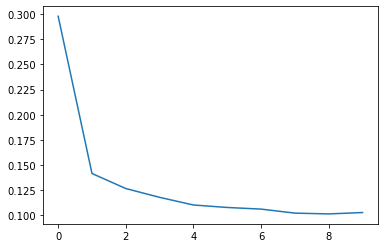

In [21]:
history_df = pd.DataFrame(history.history)
history_df['loss'].plot();


In [22]:
sample_df = red_wine.iloc[67,:].drop(["quality"])
sample_df = pd.DataFrame(sample_df).T

In [23]:
sample_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
67,6.6,0.705,0.07,1.6,0.076,6.0,15.0,0.9962,3.44,0.58,10.7


In [24]:
sample_df = preprocessor.fit_transform(sample_df)

In [25]:
model.predict(sample_df)

1/1 [==============================] - 0s 133ms/step


array([[0.15938488]], dtype=float32)

In [26]:
red_wine.iloc[67,:]

fixed acidity            6.6000
volatile acidity         0.7050
citric acid              0.0700
residual sugar           1.6000
chlorides                0.0760
free sulfur dioxide      6.0000
total sulfur dioxide    15.0000
density                  0.9962
pH                       3.4400
sulphates                0.5800
alcohol                 10.7000
quality                  5.0000
Name: 67, dtype: float64